In [ ]:
#Digits Dataset-Görsel verilerle Rakam Sınıflandırma

#Amaç verisetinde0-9 arasında 8x8 pixel halinde bulunan rakları
#tahmin etmeye çalışır



In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


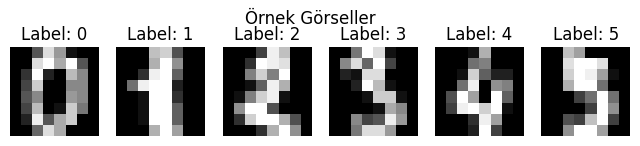

In [ ]:
#VERİ YÜKLENİP GÖRÜNTÜLENMESİ

digits=load_digits()#veri setinin yüklenmesi

X=digits.data#özellikler 8x8 64 bit
y=digits.target # hedef 0-9 arası rakamlar

plt.figure(figsize=(8,3)) #temsili görsel rakam görüntüleme

for i in range(6):
  plt.subplot(2,6,i+1)
  plt.imshow(digits.images[i],cmap='gray')
  plt.title(f"Label: {digits.target[i]}")
  plt.axis("off")


plt.suptitle("Örnek Görseller")
plt.show()

In [ ]:
#EĞİTİM VE TEST AYRIMI

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
#MODEL KURULUMU VE EĞİTMİ

knn=KNeighborsClassifier(n_neighbors=5)
#KNN modeli 5 seçilerek oluşturuldu

knn.fit(X_train,y_train)
#modelin eğitilmesi


KNeighborsClassifier()

In [ ]:
#TAHMİN VE BAŞARI

y_pred=knn.predict(X_test)


acc=accuracy_score(y_test,y_pred)
#doğruluk oranının hesaplanması

print("Model Doğruluğu (Accuracy):",acc)

Model Doğruluğu (Accuracy): 0.9861111111111112


In [ ]:
#SINIFLANDIRMA RAPORU ve CONFUSION MATRIX

print("Sınıflandırma Raporu:\n",
      classification_report(y_test,y_pred))

#sınıflandırma raporu


cm=confusion_matrix(y_test,y_pred)
#matris hesaplanması


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



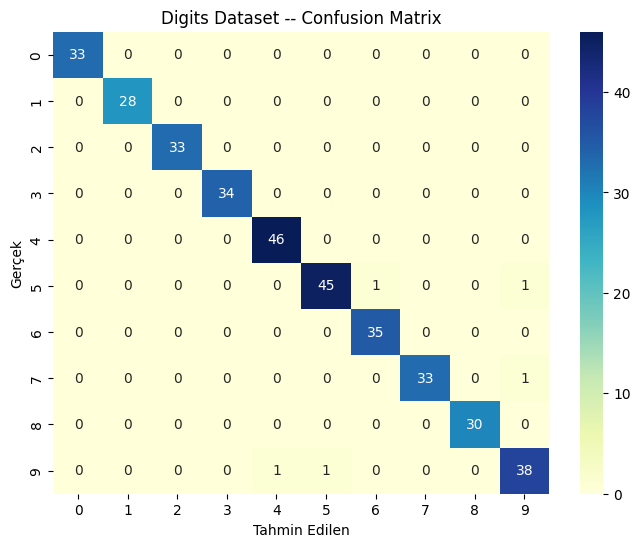

In [ ]:
#GÖRSELLEŞTİRME

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Digits Dataset -- Confusion Matrix")
plt.show()

In [ ]:
"""
Çoğu sınıf hiç hata yapmadan doğru sınıflandırılmış

Sadece birkaç sınıfta yanlış tahmin var

Matrisin çoğu sıfır, bu da modelin çok iyi ayırdığını gösterir

Hatalı Tahminler:
5 sınıfı:

1 örnek 8 olarak tahmin edilmiş

Yani 5 rakamı, 8e benzetilmiş olabilir

7 sınıfı:

1 örnek 8 olarak tahmin edilmiş

El yazısı benzerliği olabilir (7 ve 8 karışabilir)

9 sınıfı:

1 örnek 4 ve 1 örnek 5 olarak tahmin edilmiş

Toplamda sadece 4 hatalı tahmin var
Modelin başarısı oldukça yüksek


"""